<a href="https://colab.research.google.com/github/ysc4/CCDATSCL_EXERCISES_COM222/blob/main/Exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1

In this activity, you will work with the New York City Airbnb Open Data—a popular, messy, and highly realistic dataset used by data analysts and data scientists around the world. The dataset includes thousands of Airbnb listings along with details about hosts, locations, prices, reviews, and more.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR8Pmq3Gv7y7z_2Xun-OqMIk43kd5u0TXEatw&s"/>


To guide your work, you will follow the 6-Step Data Wrangling Process, a professional workflow used in industry:

- Discovering. Become familiar with the data by exploring its structure and observing patterns.

- Structuring. Fix issues related to format, column types, indices, and duplicated records.

- Cleaning. Handle missing values, outliers, and inconsistencies so the dataset becomes trustworthy.

- Enriching. Add new features, aggregate information, and enhance the dataset for deeper insights.

- Validating. Apply rule-based checks to ensure the data meets quality standards.

- Publishing. Export and prepare the cleaned dataset for downstream analysis or reporting.
Throughout this exercise, you will answer questions and fill in code cells based on these six steps. You will mimic what professional data scientists do when preparing data for business intelligence dashboards, machine learning models, or exploratory analysis.

In [130]:
import kagglehub
import os
import pandas as pd
import numpy as np

# Download latest version
path = kagglehub.dataset_download("dgomonov/new-york-city-airbnb-open-data")

print("Path to dataset files:", path)

if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset

df = pd.read_csv(mydataset)

Using Colab cache for faster access to the 'new-york-city-airbnb-open-data' dataset.
Path to dataset files: /kaggle/input/new-york-city-airbnb-open-data
True


## A. Discovering


Display the first 10 rows

In [131]:
# put your answer here

df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


Display the column names:

In [132]:
# put your answer here

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Display the dataframe shape:

In [133]:
# put your answer here

df.shape

(48895, 16)

Identify the numerical features:

In [134]:
# put your answer here

df.select_dtypes(include=['number']).columns

Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

Identify the categorical features

In [135]:
df.select_dtypes(include=['object']).columns

Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'last_review'],
      dtype='object')

What are the top 5 questions this dataset might help answer?

In [136]:
# put your answer here

print('1. Which neighborhoods have the highest and lowest average Airbnb prices?')
print('2. How does room type (Entire home/apartment, Private room, Shared room) affect pricing across different boroughs?')
print('3. What factors influence listing popularity (measured by number_of_reviews or reviews_per_month)?')
print('4. Which hosts manage the most listings, and how does host activity vary across NYC?')
print('5. Is there a relationship between minimum_nights requirements and booking activity (reviews per month)?')

1. Which neighborhoods have the highest and lowest average Airbnb prices?
2. How does room type (Entire home/apartment, Private room, Shared room) affect pricing across different boroughs?
3. What factors influence listing popularity (measured by number_of_reviews or reviews_per_month)?
4. Which hosts manage the most listings, and how does host activity vary across NYC?
5. Is there a relationship between minimum_nights requirements and booking activity (reviews per month)?


## B. Structuring

Check if the dataset has proper column types

In [137]:
# put your answer here

display(df.dtypes)

,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,object
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,int64


Check if the dataset has index issues

In [138]:
# put your answer here

df.index

RangeIndex(start=0, stop=48895, step=1)

Check if the dataset has duplicated rows

In [139]:
# put your answer here

df.duplicated().sum()

np.int64(0)

Convert columns to correct types (e.g., dates → datetime).

In [140]:
# put your answer here

df['last_review'] = pd.to_datetime(df['last_review'])

Identify at least one structural issue and describe how to fix it.

In [141]:
# put your answer here
print('One structural issue: Price column in int64 data type')
df['price'] = df['price'].astype(float)

df.dtypes

One structural issue: Price column in int64 data type


,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,object
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,float64


## C. Cleaning



Check for missing values

In [142]:
# put your answer here

df.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


Check for outliers in `minimum_nights`

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64


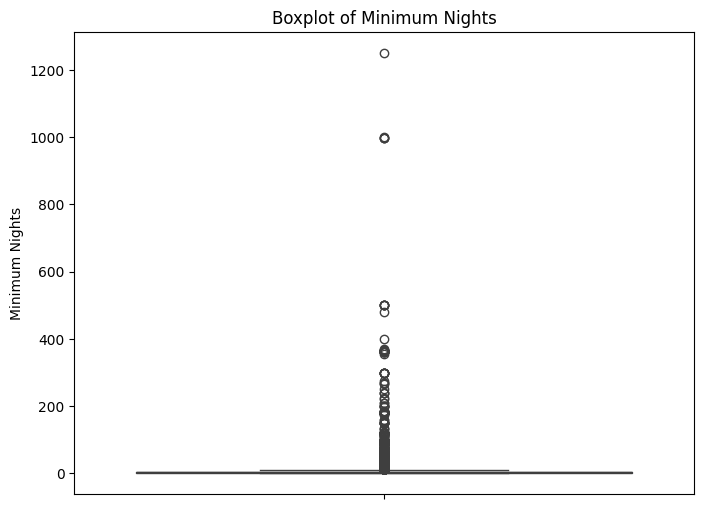

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

print(df['minimum_nights'].describe())

plt.figure(figsize=(8, 6))
sns.boxplot(y=df['minimum_nights'])
plt.title('Boxplot of Minimum Nights')
plt.ylabel('Minimum Nights')
plt.show()

Check for invalid values (e.g., price ≤ 0)

In [144]:
print((df['price'] <= 0).sum())

11


Apply a missing-value strategy (drop, fill, or flag)


In [145]:
df['reviews_per_month'].fillna(0, inplace=True)
df['name'].fillna('Unknown', inplace=True)
df['host_name'].fillna('Unknown', inplace=True)
df['last_review'].fillna('N/A', inplace=True)

df.isnull().sum()

/tmp/ipython-input-2017089109.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews_per_month'].fillna(0, inplace=True)
/tmp/ipython-input-2017089109.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


Apply an outlier-handling strategy

In [146]:
cap_value = df['minimum_nights'].quantile(0.99)
df['minimum_nights'] = np.where(df['minimum_nights'] > cap_value, cap_value, df['minimum_nights'])

print(df['minimum_nights'].describe())

count    48895.000000
mean         6.116760
std          9.244957
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max         45.000000
Name: minimum_nights, dtype: float64


## D. Enriching

Create at least 3 new variables:
- price_per_minimum_night
- review_rate_per_month (combine ratings + frequency)
- is_expensive (boolean flag based on price threshold)


In [147]:
# put your answer here

df['price_per_minimum_night'] = df['price'] / df['minimum_nights']
df['review_rate_per_month'] = df['number_of_reviews'] / df['reviews_per_month']
df['is_expensive'] = df['price'] > 1000

df['review_rate_per_month'] = df['review_rate_per_month'].replace([np.inf, -np.inf], 0)

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_per_minimum_night,review_rate_per_month,is_expensive
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9,2018-10-19 00:00:00,0.21,6,365,149.0,42.857143,False
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45,2019-05-21 00:00:00,0.38,2,355,225.0,118.421053,False
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0,N/A,0.00,1,365,50.0,NaN,False
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270,2019-07-05 00:00:00,4.64,1,194,89.0,58.189655,False
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9,2018-11-19 00:00:00,0.10,1,0,8.0,90.000000,False


Create 1 aggregated summary table

(e.g. average price per neighborhood number of hosts per borough)

In [148]:
import pandas as pd

summary = df.groupby('neighbourhood_group')['price'].agg(
    average_price='mean',
    min_price='min',
    max_price='max'
).reset_index()

hosts_count = df.groupby('neighbourhood_group')['host_id'].nunique().reset_index(name='number_of_hosts')

summary = pd.merge(summary, hosts_count, on='neighbourhood_group')

display(summary)


,neighbourhood_group,average_price,min_price,max_price,number_of_hosts
0,Bronx,87.496792,0.0,2500.0,789
1,Brooklyn,124.383207,0.0,10000.0,15966
2,Manhattan,196.875814,0.0,10000.0,16578
3,Queens,99.517649,10.0,10000.0,3983
4,Staten Island,114.812332,13.0,5000.0,256


## E. Validating

Create at least 3 validation checks
- Price must be positive.
- Host ID should not be null.
- Minimum nights must be ≥ 1.
- Generate a validation report:
- Count of rows violating each rule.

Decide if invalid rows (if any) should be removed or corrected?

In [154]:
# put your answer here

print("Validation Report")
print("====================================\n")

print("Null Value Checks")
print(df.isnull().sum())

print("Validation Rule Results")
print(f"Invalid prices (<= 0): {(df['price'] <= 0).sum()}")
print(f"Missing host IDs: {df['host_id'].isnull().sum()}")
print(f"Invalid minimum nights (< 1): {(df['minimum_nights'] < 1).sum()}")
print(f"Missing room type entries: {df['room_type'].isnull().sum()}")
print(f"Missing neighbourhood entries: {df['neighbourhood'].isnull().sum()}")

df['price_invalid'] = df['price'] <= 0
df['review_rate_per_month'] = df['review_rate_per_month'].fillna(0)

print("Fixes Applied")
print("• Filled missing 'review_rate_per_month' with 0")
print("• Added flags for invalid and extreme values")

df.head(10)

Validation Report

Null Value Checks
id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
price_per_minimum_night           0
review_rate_per_month             0
is_expensive                      0
price_invalid                     0
dtype: int64
Validation Rule Results
Invalid prices (<= 0): 11
Missing host IDs: 0
Invalid minimum nights (< 1): 0
Missing room type entries: 0
Missing neighbourhood entries: 0
Fixes Applied
• Filled missing 'review_rate_per_month' with 0
• Ad

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_per_minimum_night,review_rate_per_month,is_expensive,price_invalid
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9,2018-10-19 00:00:00,0.21,6,365,149.000000,42.857143,False,False
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45,2019-05-21 00:00:00,0.38,2,355,225.000000,118.421053,False,False
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0,N/A,0.00,1,365,50.000000,0.000000,False,False
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270,2019-07-05 00:00:00,4.64,1,194,89.000000,58.189655,False,False
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9,2018-11-19 00:00:00,0.10,1,0,8.000000,90.000000,False,False
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200.0,3.0,74,2019-06-22 00:00:00,0.59,1,129,66.666667,125.423729,False,False
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60.0,45.0,49,2017-10-05 00:00:00,0.40,1,0,1.333333,122.500000,False,False
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79.0,2.0,430,2019-06-24 00:00:00,3.47,1,220,39.500000,123.919308,False,False
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79.0,2.0,118,2017-07-21 00:00:00,0.99,1,0,39.500000,119.191919,False,False
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150.0,1.0,160,2019-06-09 00:00:00,1.33,4,188,150.000000,120.300752,False,False


## F. Publishing

Select final columns for publication.



In [155]:
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_per_minimum_night,review_rate_per_month,is_expensive,price_invalid
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9,2018-10-19 00:00:00,0.21,6,365,149.000000,42.857143,False,False
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45,2019-05-21 00:00:00,0.38,2,355,225.000000,118.421053,False,False
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0,N/A,0.00,1,365,50.000000,0.000000,False,False
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270,2019-07-05 00:00:00,4.64,1,194,89.000000,58.189655,False,False
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9,2018-11-19 00:00:00,0.10,1,0,8.000000,90.000000,False,False
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200.0,3.0,74,2019-06-22 00:00:00,0.59,1,129,66.666667,125.423729,False,False
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60.0,45.0,49,2017-10-05 00:00:00,0.40,1,0,1.333333,122.500000,False,False
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79.0,2.0,430,2019-06-24 00:00:00,3.47,1,220,39.500000,123.919308,False,False
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79.0,2.0,118,2017-07-21 00:00:00,0.99,1,0,39.500000,119.191919,False,False
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150.0,1.0,160,2019-06-09 00:00:00,1.33,4,188,150.000000,120.300752,False,False


In [156]:
# put your answer here

final_df = df.copy()
final_df = final_df.drop(columns=['id', 'host_id', 'host_name', 'latitude', 'longitude', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'is_expensive', 'price_invalid', 'availability_365'])

final_df.head(10)

,name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,price_per_minimum_night,review_rate_per_month
0,Clean & quiet apt home by the park,Brooklyn,Kensington,Private room,149.0,1.0,9,149.000000,42.857143
1,Skylit Midtown Castle,Manhattan,Midtown,Entire home/apt,225.0,1.0,45,225.000000,118.421053
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,Private room,150.0,3.0,0,50.000000,0.000000
3,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,Entire home/apt,89.0,1.0,270,89.000000,58.189655
4,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,Entire home/apt,80.0,10.0,9,8.000000,90.000000
5,Large Cozy 1 BR Apartment In Midtown East,Manhattan,Murray Hill,Entire home/apt,200.0,3.0,74,66.666667,125.423729
6,BlissArtsSpace!,Brooklyn,Bedford-Stuyvesant,Private room,60.0,45.0,49,1.333333,122.500000
7,Large Furnished Room Near B'way,Manhattan,Hell's Kitchen,Private room,79.0,2.0,430,39.500000,123.919308
8,Cozy Clean Guest Room - Family Apt,Manhattan,Upper West Side,Private room,79.0,2.0,118,39.500000,119.191919
9,Cute & Cozy Lower East Side 1 bdrm,Manhattan,Chinatown,Entire home/apt,150.0,1.0,160,150.000000,120.300752


Export cleaned dataset as "cleaned_airbnb.csv"

In [157]:
# put your answer here

final_df.to_csv('cleaned_airbnb.csv', index=False)

Export summary reports (e.g., validation or aggregations) as CSV.

In [158]:
# put your answer here

summary.to_csv('summary_report.csv', index=False)